# 1. Judul / Topik Project dan Identitas Lengkap

Judul/Topik : Deteksi Email Spam Menggunakan Algoritma Naive Bayes dan Ekstraksi Fitur TF-IDF

Identitas Lengkap:

Nama : Muhammad Falah Altairgunna

NIM : A11.2023.15290

Kelompok : A11.4402

Mata Kuliah : Pembelajaran Mesin

Dosen : Abu Salam, M.Kom

# 2.Ringkasan dan Permasalahan project + Tujuan yang akan dicapai + Model / Alur Penyelesaian

## 2.1 Ringkasan dan Permasalahan project :

Penggunaan email yang semakin luas menyebabkan meningkatnya jumlah pesan spam yang mengganggu dan berpotensi berbahaya. Spam tidak hanya merusak kenyamanan pengguna, tetapi juga dapat menjadi celah untuk penipuan atau serangan siber. Penyaringan manual tidak efisien, sehingga dibutuhkan sistem otomatis yang mampu mendeteksi dan mengklasifikasikan email spam secara cepat dan akurat berdasarkan isi teksnya.

## 2.2 Tujuan yang akan dicapai :

1. Membangun model machine learning berbasis Naive Bayes untuk mendeteksi spam.
2. Meningkatkan akurasi dan efisiensi dalam klasifikasi email menggunakan teknik TF-IDF untuk representasi teks.


### 2.3 Model / Alur Penyelesaian :

![Bagan_ML](bagan_ML.png)

## 3. Penjelasan Dataset, EDA dan Proses Features Dataset

# 3.1 Penjelasan Dataset :
Dataset yang digunakan dalam penelitian ini adalah file combined_data.csv, yang diperoleh dari platform Kaggle, sebuah situs penyedia dataset open-source yang banyak digunakan dalam riset dan kompetisi machine learning. Dataset ini merupakan kumpulan data email yang telah dikategorikan ke dalam dua kelas, yaitu spam dan bukan spam (ham).

Setiap baris dalam dataset mewakili satu buah email, dengan dua kolom utama:

text, yang berisi isi atau konten email dalam bentuk teks, dan

label, yaitu informasi klasifikasi email, dengan nilai 1 untuk email spam dan 0 untuk email yang bukan spam.

Dataset ini cukup seimbang, terdiri dari sekitar 83.000 baris data, dengan distribusi spam dan non-spam yang hampir merata. Hal ini sangat ideal untuk proses pelatihan model klasifikasi karena dapat menghindari bias terhadap salah satu kelas.

# 3.2 EDA
Dataset yang digunakan dalam penelitian ini terdiri dari sekitar 83.000 data email yang diperoleh dari platform Kaggle, dengan dua atribut utama yaitu kolom text (isi email) dan label (klasifikasi spam atau non-spam). Analisis data eksploratif dilakukan untuk memastikan kualitas dan kelayakan data, termasuk menghapus data kosong serta memeriksa distribusi kelas. Hasilnya menunjukkan distribusi yang cukup seimbang, yaitu sekitar 43.910 email spam dan 39.538 non-spam, sehingga cocok untuk pelatihan model klasifikasi. Secara umum, email spam mengandung pola kata-kata khas seperti "free", "click here", dan "offer", yang menjadi indikasi penting dalam proses ekstraksi fitur untuk deteksi spam.

# 3.3 Proses Features Dataset
Pada tahap ini, data teks pada kolom `text` diolah agar dapat digunakan sebagai input bagi algoritma machine learning. Proses diawali dengan pra-pemrosesan teks seperti menghapus data kosong, mengubah huruf menjadi lowercase, serta menghapus kata-kata umum (stopwords). Selanjutnya, dilakukan ekstraksi fitur menggunakan metode **TF-IDF (Term Frequency–Inverse Document Frequency)** untuk mengubah teks menjadi representasi numerik. TF-IDF memberikan bobot pada setiap kata berdasarkan frekuensi kemunculannya dalam satu email dibandingkan dengan seluruh dokumen, sehingga kata-kata yang unik dan relevan seperti "win", "limited", atau "discount" mendapatkan bobot lebih tinggi. Hasil akhir dari proses ini adalah sebuah matriks fitur yang merepresentasikan setiap email sebagai vektor angka, yang kemudian digunakan dalam proses pelatihan model Naive Bayes.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## 4. Proses Learning / Modeling

In [2]:
# 1. Baca dataset
df = pd.read_csv("combined_data.csv")

In [3]:
# 2. Cek dan tampilkan data awal
print("Jumlah baris:", len(df))
print("Kolom:", df.columns.tolist())
print(df.head())

Jumlah baris: 83448
Kolom: ['label', 'text']
   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0   computer connection from cnn com wednesday es...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answers guys i know i shou...


In [4]:
# 3. Normalisasi kolom
df.columns = df.columns.str.strip().str.lower()  # pastikan tidak ada spasi
TEXT_COL = "text"
LABEL_COL = "label"

In [5]:
# 4. Hapus baris yang kosong
df = df.dropna(subset=[TEXT_COL, LABEL_COL])


In [6]:
# 5. Jika label masih string, ubah ke numerik
if df[LABEL_COL].dtype == object:
    df[LABEL_COL] = df[LABEL_COL].str.lower().map({"spam": 1, "ham": 0})


In [7]:
# 6. Cek distribusi label
print("Distribusi label:")
print(df[LABEL_COL].value_counts())

Distribusi label:
label
1    43910
0    39538
Name: count, dtype: int64


In [8]:
# 7. Split data
if df[LABEL_COL].nunique() > 1:
    X_train, X_test, y_train, y_test = train_test_split(
        df[TEXT_COL],
        df[LABEL_COL],
        test_size=0.2,
        random_state=42,
        stratify=df[LABEL_COL]
    )
else:
    raise ValueError("Label hanya memiliki satu kelas atau kosong.")


In [9]:
# 8. Buat pipeline Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])

In [10]:
# 9. Training model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('nb', MultinomialNB())])

## 5. Performa Model

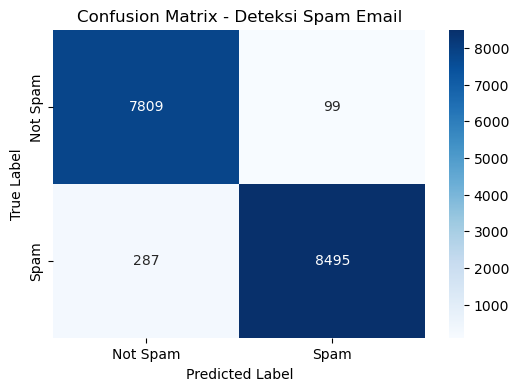


Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.96      0.99      0.98      7908
        Spam       0.99      0.97      0.98      8782

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690



In [11]:
# 10. Evaluasi model
y_pred = pipeline.predict(X_test)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Buat heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Deteksi Spam Email")
plt.show()

# Tampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Spam", "Spam"], zero_division=0))

Hasil Evaluasi:

* Accuracy: 98%
* Precision (Spam): 99%
* Recall (Spam): 97%
* F1-score (Spam): 0.98

Model mencapai akurasi 98% dan f1-score 0.98, menunjukkan performa yang sangat baik dalam mengenali spam dan non-spam.

Artinya:

* 7809 email non-spam terdeteksi dengan benar
* 8495 email spam terdeteksi dengan benar
* Kesalahan prediksi sangat kecil

## 6. Diskusi Hasil dan Kesimpulan :
# Diskusi
*  Model bekerja sangat baik dalam mengenali spam, berkat kombinasi preprocessing teks dan TF-IDF.
*  Meski akurasi sangat tinggi, masih terdapat sedikit kesalahan dalam mendeteksi spam yang ditulis dengan gaya penulisan tidak umum.
*  Naive Bayes sangat efisien, cocok digunakan untuk implementasi di sistem email nyata.

# Kesimpulan :
*  Model Naive Bayes terbukti efektif dalam mendeteksi spam dengan akurasi hingga 98%.
*  Penggunaan TF-IDF membantu menonjolkan kata-kata kunci dalam teks email.
*  Sistem ini dapat digunakan sebagai fondasi awal untuk sistem penyaring spam otomatis. 